## Project1: Movie Genre classification 
- I have to create a machine learning model that can predict the genre of a movie based on it's plot summary or other textual information.
- Next i can use the techniques like TF-IDF or word embedding with classifer such as Navie Bayes, Logistic Regression or Support Vector machine

In [1]:
# importing different libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re # regular expression for pattern matching
import string # dealing with string operation
import nltk # for text processing
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
pd.set_option('display.max_columns',None)#displaying the all columns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/milandangi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/milandangi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/milandangi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/milandangi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## loading dataset - train_data and test_data
- When i checked data i found it's in the txt format and separated by ':::' and there is not index too.
- So, I make the index into 3 parts(title, genre and description)

In [2]:

train_df = pd.read_csv('train_data.txt', sep= ':::',names=['title','genre','description'])
test_df =pd.read_csv('test_data.txt',sep=':::', names = ['title','genre','description'])


/var/folders/dn/6rswl2cs6j3cg53031stv1m80000gn/T/ipykernel_1251/2001455174.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df = pd.read_csv('train_data.txt', sep= ':::',names=['title','genre','description'])
/var/folders/dn/6rswl2cs6j3cg53031stv1m80000gn/T/ipykernel_1251/2001455174.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df =pd.read_csv('test_data.txt',sep=':::', names = ['title','genre','description'])


In [3]:
train_df.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [7]:
# shape
train_df.shape

(54214, 3)

In [8]:
# berif description of dataset
train_df.describe()

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


### Handling Missing Values 

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [10]:
train_df.isna().sum()

title          0
genre          0
description    0
dtype: int64

In [11]:
#checking different genre 
train_df.genre.value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: genre, dtype: int64

In [12]:
train_df.duplicated().sum()

0

## Visualizing the count of 'genre' column

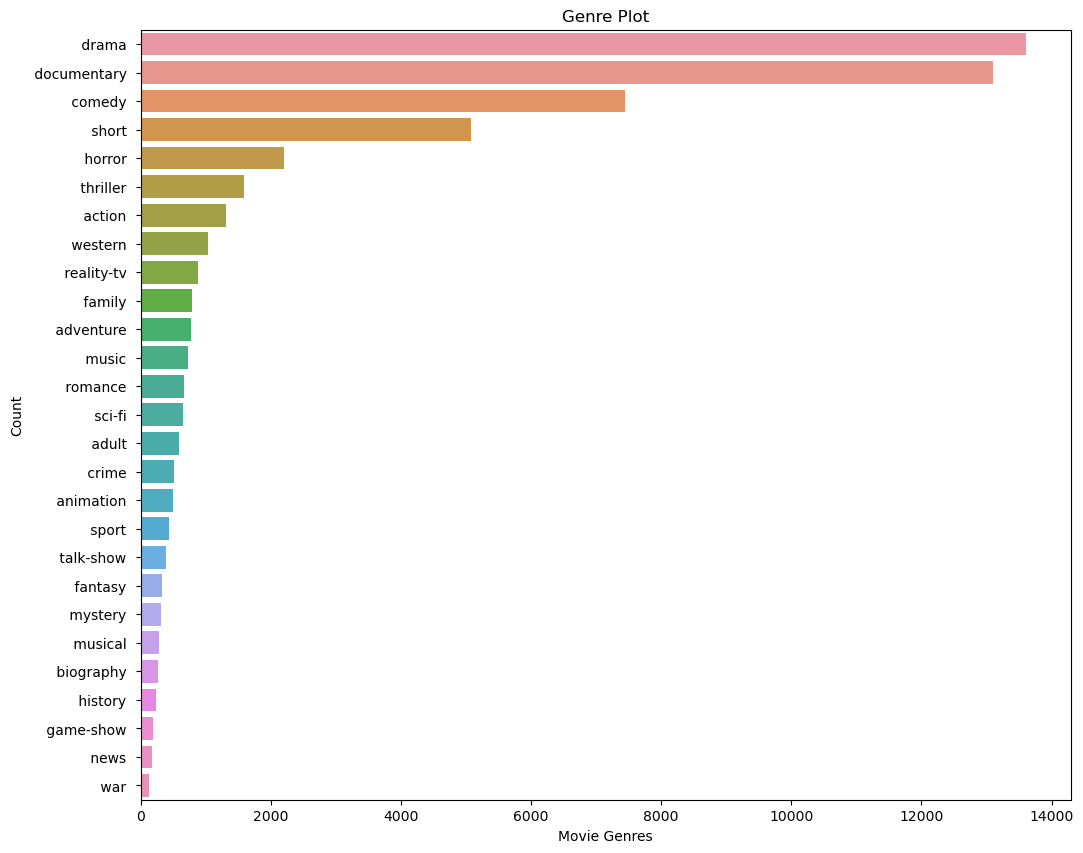

In [6]:
plt.figure(figsize=(12,10))#here parameter specifies the width and height of figure
sns.countplot(y='genre',data=train_df,order=train_df['genre'].value_counts().index)
plt.xlabel("Movie Genres")
plt.ylabel("Count")
plt.title('Genre Plot')
plt.show()

In [9]:
# check the text of description
train_df['description'][1]

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

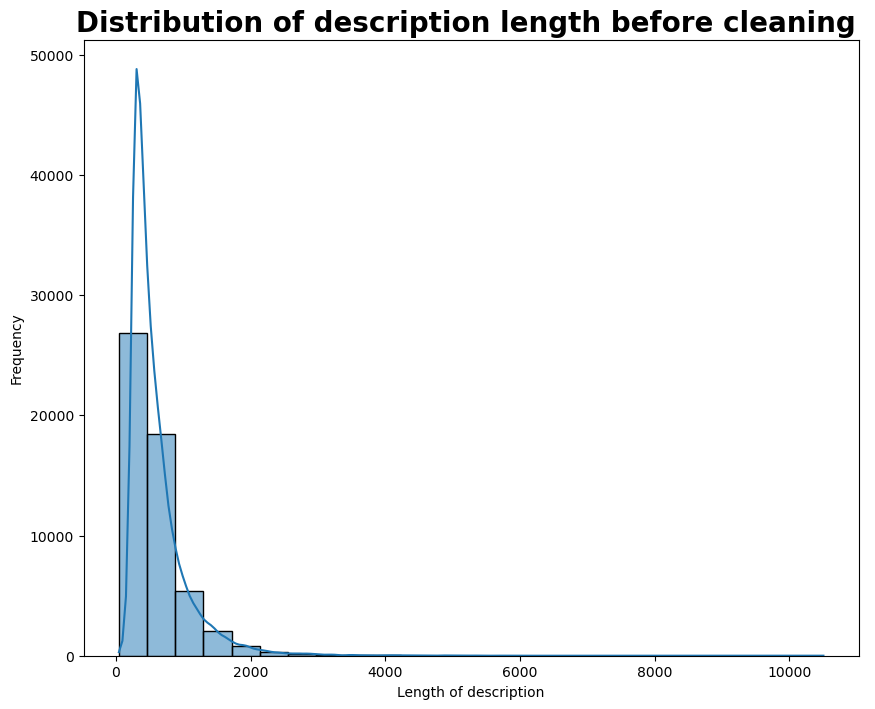

In [23]:
# Visualizing distribution of description  using length of text
train_df['before_desc_clean_len'] = train_df['description'].apply(len)
plt.figure(figsize=(10,8))
sns.histplot(data=train_df,x='before_desc_clean_len',bins= 25,kde=True)
plt.xlabel('Length of description')
plt.ylabel('Frequency')
plt.title('Distribution of description length before cleaning ',fontsize=20,fontweight='bold')
plt.show()

## Data Preprocessing and text Cleaning

### Text Cleaning

In [26]:

def preprocess_text(text):
    text = text.lower()
    #removing special characters and digits using re
    text = re.sub('r\d','',text)#remove digits
    text =re.sub('r[^\w\s]','',text)#remove special character
    
    #tokenize the text
    token = nltk.word_tokenize(text)
    return token
    

In [27]:
# let's remove stopwords like 'the', 'is',..
def remove_stopwords(tokens):
    # import stopwords from nltk library for english language and convert into set dat structure
    stop_words = set(stopwords.words('english'))
    #filtering words
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return filtered_tokens                              
                            
                                    

In [28]:
#let's change the words like ( dance, dancer,dances,dancing) into (dance)
def perform_lemmatization(tokens):
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

In [29]:
#let's combine all function together
def clean_text(text):
    tokens = preprocess_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens = perform_lemmatization(filtered_tokens)
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

In [30]:
#applying text cleaning to dataset
train_df['description_clean']=train_df['description'].apply(clean_text)

In [31]:
#text after cleaning
train_df['description_clean'][1]

'listening conversation doctor parent , 10-yeaold oscar learns nobody courage tell . week live . furious , refuse speak anyone except straight-talking rose , lady pink meet hospital stair . christmas approach , rose us fantastical experience professional wrestle imagination , wit charm allow oscar live life love full , company friend pop corn , einstein , bacon childhood sweetheart peggy blue .'

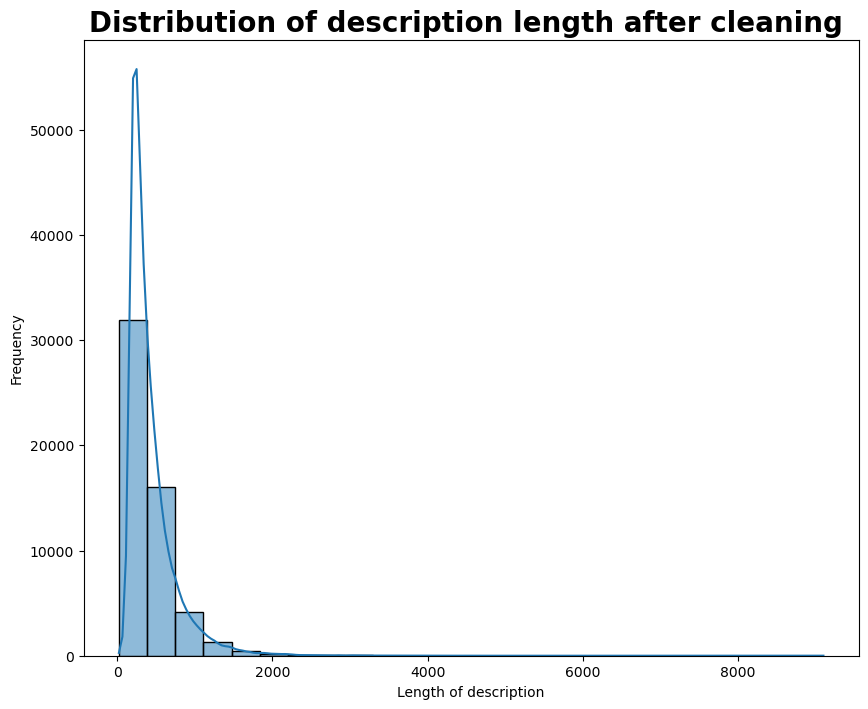

In [32]:
#let's visulaize the distribution of Description length after cleaning the text
train_df['after_desc_clean_len']= train_df['description_clean'].apply(len)

plt.figure(figsize=(10,8))
sns.histplot(data=train_df, x='after_desc_clean_len',kde=True,bins=25)
plt.xlabel('Length of description')
plt.ylabel('Frequency')
plt.title('Distribution of description length after cleaning ',fontsize=20,fontweight='bold')
plt.show()

In [36]:
train_df.drop(columns=['before_length_desc_clean'],inplace=True)

In [37]:
train_df.head(5)

,title,genre,description,description_clean,before_desc_clean_len,after_desc_clean_len
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,"listening conversation doctor parent , 10-yeao...",546,396
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...,184,121
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...,650,415
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,"help unemployed father make end meet , edith t...",1082,775
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film 's title refers un-recovered body ground ...,625,444


In [59]:
test_df['description_clean']=test_df['description'].apply(clean_text)

## Count  Vectorizer


In [54]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000,stop_words='english')


In [55]:
vectors = count_vectorizer.fit_transform(train_df['description_clean']).toarray()

In [56]:
feat_names = count_vectorizer.get_feature_names()
count_vectorizer.get_feature_names()

['000',
 '10',
 '100',
 '1000',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1930',
 '1930s',
 '1940',
 '1944',
 '1945',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1968',
 '1969',
 '1970',
 '1970s',
 '1972',
 '1973',
 '1975',
 '1979',
 '1980',
 '1980s',
 '1982',
 '1984',
 '1985',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1997',
 '1998',
 '1999',
 '19th',
 '20',
 '200',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '20th',
 '21',
 '21st',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '35',
 '3d',
 '40',
 '400',
 '45',
 '48',
 '50',
 '500',
 '60',
 '70',
 '80',
 '90',
 'aaron',
 'abandon',
 'abandoned',
 'abc',
 'abducted',
 'ability',
 'able',
 'aboard',
 'abortion',
 'abroad',
 'absence',
 'absent',
 'absolutely',
 'abstract',
 'absurd',
 'abuse',
 'abused',
 'abusive',
 

## Text Vectorization Using TF_IDF(Term frequency-Inverse Document Frequency )
- better approach then count vectorizer
- TF means number of time the word occurs in document divided by total number of words in the document
- IDF is the total number of document 'd' that contain term 't'
 $ IDF(t,D) = \log(\frac{N}{n_{t}})$<br>
 where:$ t \in d , d \in D $ <br>
 Thus, <b> TF-IDF <b>vector, <br>
         tfidf(t,d,D) = tf(t,d) * idf(t,D) 
 

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vectorizer.fit_transform(train_df['description_clean'])

# Transform the test data
X_test = tfidf_vectorizer.transform(test_df['description_clean'])

## Split Data and Train a model ( Navie Bayes)


In [77]:
# split the data into training and validation set
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# spliting the data into training and validation set
X = X_train
Y = train_df['genre']
X_train, X_val, y_train ,y_val = train_test_split(X,Y,test_size = 0.2, random_state= 42)

# initialize and train a multinomial navie bayes classifier
clf = MultinomialNB()
clf.fit(X_train,y_train)

# Make a prediction on the validation set
y_pred = clf.predict(X_val)

#Evaluate the performance of the model
accuracy  = accuracy_score(y_val, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.4429585907959052
               precision    recall  f1-score   support

      action        0.00      0.00      0.00       263
       adult        0.00      0.00      0.00       112
   adventure        0.00      0.00      0.00       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.63      0.04      0.08      1443
       crime        0.00      0.00      0.00       107
 documentary        0.53      0.90      0.66      2659
       drama        0.38      0.87      0.53      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.00      0.00      0.00        40
     history        0.00      0.00      0.00        45
      horror        0.00      0.00      0.00       431
       music        0.00      0.00      0.00       144
     musical        0.00      0.00      0.00        50
     mystery        0.00

/Users/milandangi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/milandangi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/milandangi/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
#Make Predictions on the Test Data
#let's use trained model to make predictions on the test data
X_test_pred = clf.predict(X_test)
test_df['Predicted_Genre']= X_test_pred

In [85]:
#let's save test_data with predicted genre to a CSV file
test_df.to_csv("Movie_genre_classification.csv,",index=False)

In [88]:
#let's check
check_genre = pd.read_csv('Movie_genre_classification.csv')

In [89]:
check_genre.head(5)

,title,genre,description,description_clean,Predicted_Genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...","l. brane love life - ca apartment , job , espe...",drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...","spain , march 1964 : quico naughty child three...",drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...","father died , n't spoken brother 10 year serio...",drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art supersta bru...,drama
